<span style="font-size:30px;">Project :- Fake News Detection </span><br>

In [1]:
import pandas as pd #for data frame
import numpy as np  # for multi dimensional array
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns    # for data visualization


<span style="font-size:24px;">Loading the data </span><br>

In [2]:
#reading the data 
# Load the training data
train_data = pd.read_csv("D:\\fake news classification\\train.csv")


train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
train_data.shape

(20800, 5)

In [4]:
# Display information about the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
# checking for missing values which is a boolean method
train_data.isna()

,id,title,author,text,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
20795,False,False,False,False,False
20796,False,False,False,False,False
20797,False,False,False,False,False
20798,False,False,False,False,False


In [6]:
#counting the total(sum) no of missing values for a column
train_data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
#dropping the unique column since ML cant handle unique values
train_data = train_data.drop( ['id'], axis=1)

In [8]:
#checking the train_data content again
train_data.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
# filling missing values with empty string
train_data = train_data.fillna('')

In [10]:
#combining the other three columns into a single column
train_data['content'] = train_data['author']+' '+ train_data['title']+' '+train_data['text']

In [11]:
#dropping the other 3 columns
train_data = train_data.drop( ['title','author','text'], axis = 1)

In [12]:
#checking the data after dropping the columns 
train_data.head()

,label,content
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...


In [13]:
#verifying  the total(sum) no of missing values after handling misssing values
train_data.isna().sum()

label      0
content    0
dtype: int64

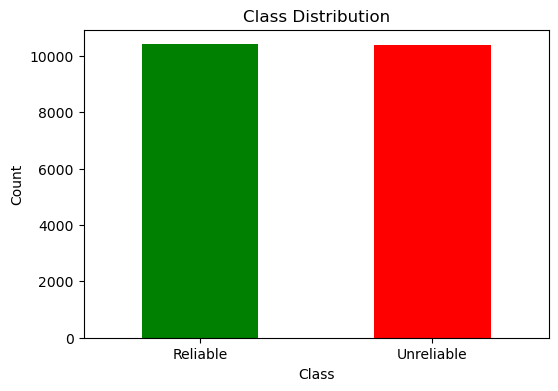

In [14]:
# Counting  the occurrences of each class label
class_distribution = train_data['label'].value_counts()

# Plotting  the bar chart
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Reliable', 'Unreliable'], rotation=0)
plt.show()

In [15]:
#pip install wordcloud


In [16]:
#from wordcloud import WordCloud
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_data['content']))
#plt.figure(figsize=(10, 6))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.title('Word Cloud')
#plt.show()

<span style="font-size: 25px;">DATA PRE-PROCESSING .</span>


In [17]:
#CONVERTING TO LOWERCASE
train_data['content'] = train_data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [18]:
#removing special characters
train_data['content'] = train_data['content'].str.replace('[^\w\s]','') 

In [19]:
import re
train_data['content'] = train_data['content'].str.replace('[^\w\s]', '', regex=True, flags=re.IGNORECASE)


In [20]:
train_data['content'] = train_data['content'].str.replace('[^\w\s]+', '', regex=True)


In [21]:
train_data.head()

,label,content
0,1,darrell lucus house dem aide we didnt even see...
1,0,daniel j flynn flynn hillary clinton big woman...
2,1,consortiumnewscom why the truth might get you ...
3,1,jessica purkiss 15 civilians killed in single ...
4,1,howard portnoy iranian woman jailed for fictio...


In [22]:
#removal of stop words
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train_data['content'] = train_data['content'].apply(lambda x: " ".join(x  for x in x.split() if x not in stop)) 


In [24]:
#lemmatization
from nltk.stem import WordNetLemmatizer
from textblob import Word
train_data['content'] = train_data['content'].apply(lambda x: " ".join([Word(word).lemmatize()  for word in x.split()])) 
train_data['content'].head()

0    darrell lucus house dem aide didnt even see co...
1    daniel j flynn flynn hillary clinton big woman...
2    consortiumnewscom truth might get fired truth ...
3    jessica purkiss 15 civilian killed single u ai...
4    howard portnoy iranian woman jailed fictional ...
Name: content, dtype: object

In [25]:
train_data.head()

,label,content
0,1,darrell lucus house dem aide didnt even see co...
1,0,daniel j flynn flynn hillary clinton big woman...
2,1,consortiumnewscom truth might get fired truth ...
3,1,jessica purkiss 15 civilian killed single u ai...
4,1,howard portnoy iranian woman jailed fictional ...


In [26]:
train_data['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

In [27]:
#seperating the data 
X = train_data[['content']]#features
y = train_data['label']#target


In [28]:
X.shape,y.shape

((20800, 1), (20800,))

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#splitting into training data and testing data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100,stratify=y) 

In [31]:
#validating the shappe of train and test data 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14560, 1)
(14560,)
(6240, 1)
(6240,)


In [32]:
y_test.value_counts()

label
1    3124
0    3116
Name: count, dtype: int64

<span style="font-size:24px;">Vectorization</span><br>

In [33]:
from sklearn.feature_extraction.text  import TfidfVectorizer

In [34]:
# Create TF-IDF vectors for the 'text' column
tfidf_vect = TfidfVectorizer(max_df=0.7)
#tfidf_vect.fit(train_data['content'])
xtrain_tfidf = tfidf_vect.fit_transform(X_train['content'])
xtest_tfidf = tfidf_vect.transform(X_test['content']) 

<span style="font-size:26px;">Model Building</span><br>

<span style="font-size:24px;">PassiveAggressiveClassifier</span><br>

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc
from sklearn.linear_model import  PassiveAggressiveClassifier
pclf = PassiveAggressiveClassifier(max_iter=50)
pclf.fit(xtrain_tfidf,y_train)
predictions = pclf.predict(xtest_tfidf)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3116
           1       0.97      0.97      0.97      3124

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



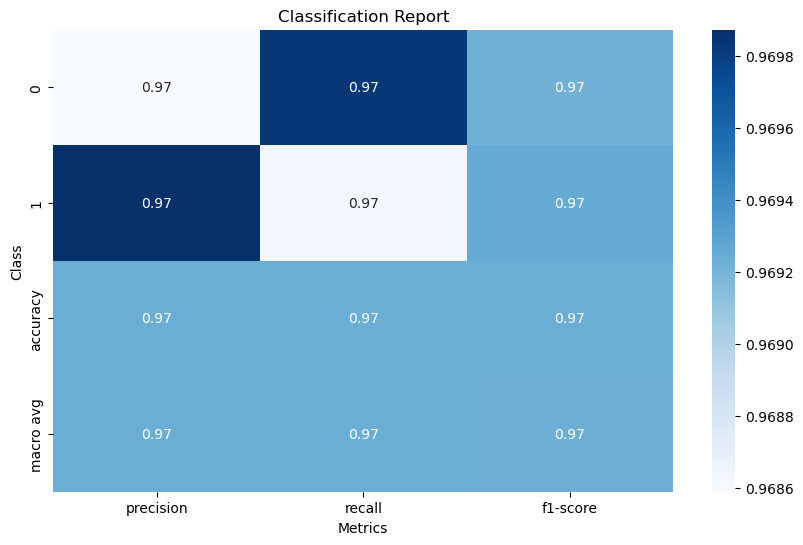

In [111]:

report=classification_report(y_test,predictions,output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()


In [112]:
cf = confusion_matrix(y_test,predictions)
print(cf)

[[3022   94]
 [  98 3026]]


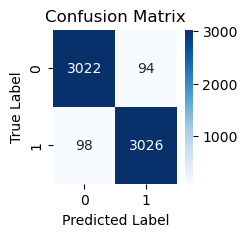

In [113]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

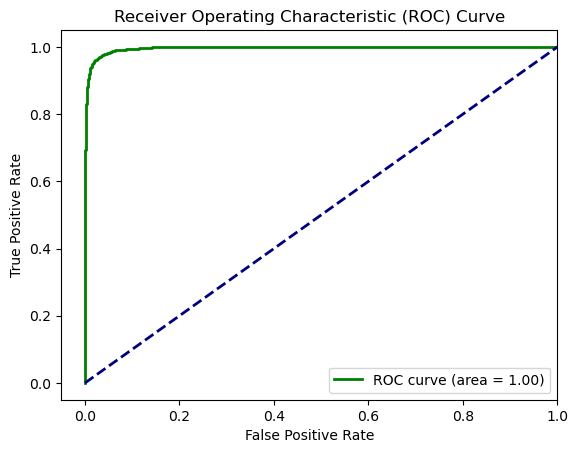

In [114]:
y_pred_proba = pclf.decision_function(xtest_tfidf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [115]:
import pickle
#save trained model to file 
pickle.dump(pclf,open("model.pkl","wb"))

In [116]:
#loading the model from the disk
loaded_model = pickle.load(open("model.pkl","rb"))

In [117]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfidf_vect.transform(input_data)
    prediction =loaded_model.predict(vectorized_input_data)
    print(prediction)

In [118]:
fake_news_det1(""" Andrea Tantaros, a former Fox News host, charged in a lawsuit filed Monday that top executives at the 
network, including the man who replaced Roger Ailes, punished her for complaining about sexual harassment by Mr. Ailes. The 
suit by Ms. Tantaros, filed in New York State Supreme Court in Manhattan, is the latest round in a contentious volley
that began in late winter, when Fox claimed she had breached her employment contract by writing a book without receiving
network approval. â€œFox News masquerades as a defender of traditional family values, but behind the scenes, it operates 
like a   Playboy   cult, steeped in intimidation, indecency and misogyny,â€ Ms. Tantarosâ€™s suit says. Fox News said it
would not comment on pending litigation. Mr. Ailes, the networkâ€™s founding chairman and guiding force for two decades,
resigned last month after a former anchor, Gretchen Carlson, said in a suit that she was fired for refusing his sexual 
advances. Mr. Ailes has denied all allegations of harassment. In April, the chief lawyer for Fox charged that Ms. Tantaros 
had concocted sexual harassment claims to gain leverage in the contract dispute her lawyer, Judd Burstein, said the book 
dispute was a pretext that Fox was using to silence her. During arbitration, Mr. Burstein said, Fox News offered to pay 
her a sum â€œin the seven figuresâ€ if she renounced claims against Mr. Ailes and others at the network, including the
host Bill Oâ€™Reilly. According to the lawsuit, Ms. Tantaros said she had been subjected to unwelcome advances from Mr. 
Oâ€™Reilly, whom she had regarded as a friend and adviser. â€œAiles did not act alone,â€ the lawsuit states. â€œHe may 
have been the primary culprit, but his actions were condoned by his most senior lieutenants, who engaged in a concerted 
effort to silence Tantaros by threats, humiliation and retaliation. â€ Ms. Tantaros also claimed in the lawsuit that she
was the subject of humiliating posts by pseudonymous accounts on Twitter known as â€œsock puppetsâ€ that she says were
instigated by the Fox News publicity department. Ms. Tantaros joined Fox as a contributor in 2010, and a year later was
named   of â€œThe Five,â€ which aired at 5 p. m. She said in the suit that she was repeatedly told by Fox executives that 
she could not wear pants on the air because â€œRoger wants to see your legs. â€ The lawsuit goes on to say that on Aug. 12,
2014, Mr. Ailes called her into his office and asked if she was planning to marry and have children. â€œAiles then started 
complaining about marriage in general, and also made   jokes about being married,â€ the lawsuit states. It describes Mr.
Ailes speculating on the sexual habits and preferences of 10 Fox News personalities. He asked Ms. Tantaros to turn around 
â€œso I can get a good look at you,â€ the lawsuit charges, adding that Ms. Tantaros refused. Soon after, she was moved from 
â€œThe Fiveâ€ to a   show, â€œOutnumbered,â€ that aired at midday. Mr. Ailes called her back for similar sessions in 
December 2014 and February 2015, the lawsuit charges, and when she continued to rebuff him, she encountered hostility
from the Fox News publicity department. In the February meeting, she said, Mr. Ailes talked about how she would look in a 
bikini, and accused her of ending a   relationship because she had been merely using the man. The episode brought her to tears
, the lawsuit states. She said the sole interview arranged by the publicity department during that period was with a writer
for a blog controlled by Fox, who asked about her breasts and if she was difficult to work with. In April 2015, the lawsuit
states, Ms. Tantaros met with Bill Shine, then a senior news executive and close aide to Mr. Ailes. She said that she told 
him about the meetings with Mr. Ailes and asked if he had told the head of publicity for Fox News, Irena Briganti, to go after
her. The lawsuit claims that Mr. Shine â€œtold Tantaros that Briganti is like a rabid dog on a chain that we canâ€™t control.
Sometimes that dog gets off the chain. â€ Then, pointing to a picture of Mr. Ailes on a magazine cover, the lawsuit charges, 
Mr. Shine told her that â€œthis powerful man has faith in Irena Brigantiâ€ and that Ms. Tantaros â€œneeds to let this one go
. â€ Mr. Shine, through a spokeswoman, has said that Ms. Tantaros never approached him about Mr. Ailes harassing her. 
Mr. Shine was named   of Fox News after Mr. Ailes departed.""") 

[0]


In [119]:
fake_news_det1(""" Clinton Campaign Demands FBI Affirm Trump's Russia Ties   """)

[1]


In [120]:
fake_news_det1("""Now, numerous studies have concluded that milk doesnâ€™t actually build bone and provide the same amount of
calcium that we thought. A study published in the British Medical Journal , for example, followed more than 100,000 people in
Sweden over periods of 20 to 30 years, with shocking results: The people who drank milk were more likely to die from heart 
disease and cancer. The women suffered more overall fractures and hip fractures as well. Different studies have also shown 
that higher dairy intake is linked to higher risks of prostate and ovarian cancer and can trigger type 1 diabetes. It is also 
linked to forms of acne, just to name a few effects. There is also the disturbing side of the dairy industry, where animals
are abused to produce the milk we drink. A lot of dairy products are filled with the hormones that were given to female cows to
keep them perpetually lactating so they produce an endless flow of milk. This doctor describes it perfectly when he says 
â€œcowâ€™s milk is for baby calfs, just like human milk is for babies.â€ It is a substance we need while in crucial stages
of development, but past a certain age, it becomes obsolete. While there are many alternatives to dairy milk, some are much
better than others. Here are some of the better â€œmilkâ€ products out there. Almond Milk Raw organic almond milk is a great
choice when you know where itâ€™s coming from. As with many mass produced products, even some almond milks arenâ€™t the best 
for us. An analysis of a UK almond milk brand showed that nuts make up only 2% of the drink itself. A single serving of almond 
milk has almost no protein. Compared with plain old almonds, it fares even worse. There is one place where almond milk comes
out on top, of course: It has more potassium and more of the vitamins A and D. But almond milk is fortified with these
nutrients â€” theyâ€™ve been added during the production process. Making almond milk yourself, however, is a fantastic option, 
and allows you to control exactly what goes inside it, ensuring there are no additives, preservatives, or substances youâ€™ve 
never even heard of before. Rice Milk Rice milk is another good choice that works well as a dairy substitute, if you donâ€™t 
mind the taste. Itâ€™s higher in carbohydrates than other milk choices and contains around the same amount of calcium as 
cowâ€™s milk. Yet it contains almost no protein, so it needs to be balanced with other protein rich foods. During processing,
the carbs break down into sugars and give the milk a sweet taste. It is filled with more sugar, around 10 grams for one serving,
which is a lot more than something like coconut milk, which has around 3 grams. If youâ€™re trying to have as little sugar as 
possible, rice milk may not be the best choice, but itâ€™s certainly better than plain old dairy milk. Coconut Milk Coconut
milk is definitely one of the healthier options here. When this milk is all natural, meaning thereâ€™s no added sugars, 
natural flavours, or preservatives, it is incredibly healthy for us. â€œ Coconuts are highly nutritious and rich in fibre, 
vitamins C, E, B1, B3, B5 and B6 and minerals including iron, selenium, sodium, calcium, magnesium and phosphorous.â€ The
things that makes coconuts so good is the type of fat they contain. They have a form of medium-chain fatty acids rather 
than long-chain fatty acids, which are stored in our tissue for much longer. One of the beneficial acids within coconuts 
is called lauric acid. This gets converted inside the body into a beneficial substance called monolaurin acid, which acts as 
an antiviral agent. But unlike other milks, if you have access, you can go right up to a coconut tree and drink the milk
straight from the coconut without the need for processing. This is one of the most pure and fresh ways to get some milk 
in you! Hemp Milk Ah, hemp; one of the most versatile plants on our planet. Hemp milk has a wide range of health benefits 
that a lot of other milks donâ€™t. Some companies make fully organic, non-GMO, and unsweetened hemp milk, but itâ€™s always 
good to check exactly where youâ€™re getting your products from. Hemp milk has a more bean-like and nutty flavor to it, which 
still tastes great in many drinks or foods. Itâ€™s also packed with healthy omega-3 fatty acids, which help with our heart
health. In a single 8-ounce glass of hemp milk you can find the following nutrients: Vitamin A""")

[1]


<span style="font-size:24px;">MLPClassifier</span><br>

In [122]:
from sklearn.neural_network   import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc
mlpclf = MLPClassifier(hidden_layer_sizes = (256,64,16) ,activation ='relu',solver  = 'adam') 
mlpclf.fit(xtrain_tfidf,y_train)
predictions = mlpclf.predict(xtest_tfidf)
print(classification_report(y_test,predictions))

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3116
           1       0.98      0.97      0.97      3124

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



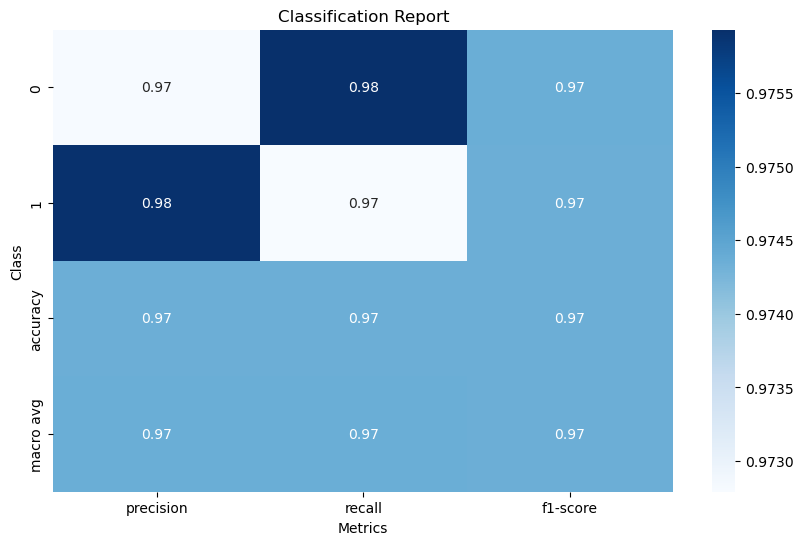

In [123]:
report=classification_report(y_test,predictions,output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [124]:
cf = confusion_matrix(y_test,predictions)
print(cf)

[[3041   75]
 [  85 3039]]


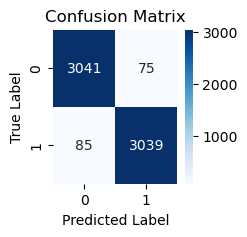

In [125]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

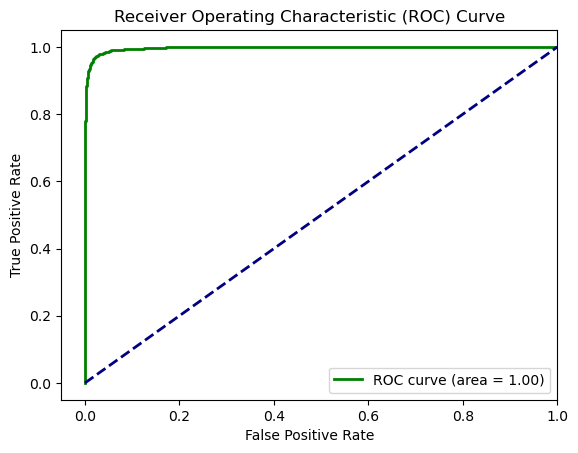

In [126]:
y_pred_proba = mlpclf.predict_proba(xtest_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<span style="font-size:24px;">LogisticRegression</span><br>

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Create a Logistic Regression classifier
logreg = LogisticRegression()

# Train the classifier
logreg.fit(xtrain_tfidf, y_train)

# Make predictions on the test data
predictions = logreg.predict(xtest_tfidf)

# Evaluate the classifier

print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3116
           1       0.95      0.96      0.95      3124

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



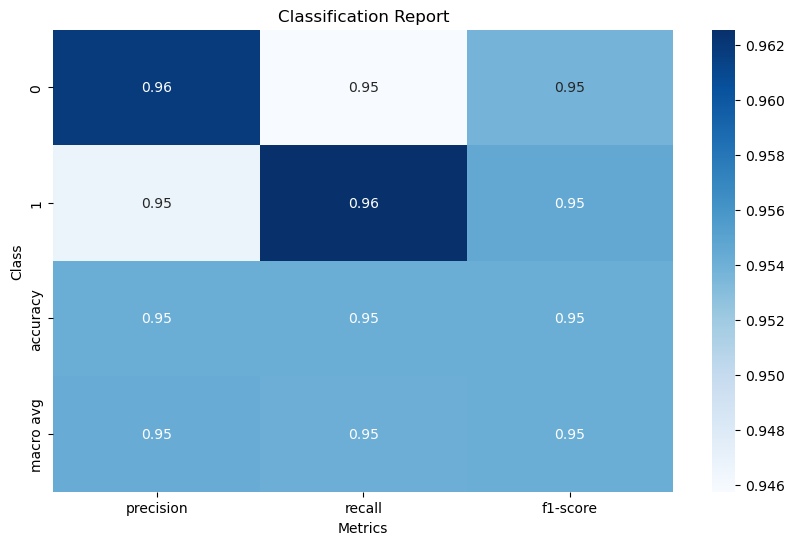

In [96]:
report=classification_report(y_test,predictions,output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [97]:
cf = confusion_matrix(y_test,predictions)
print(cf)

[[2947  169]
 [ 117 3007]]


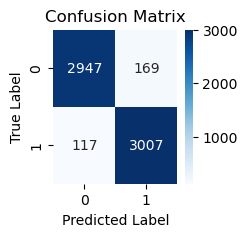

In [98]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

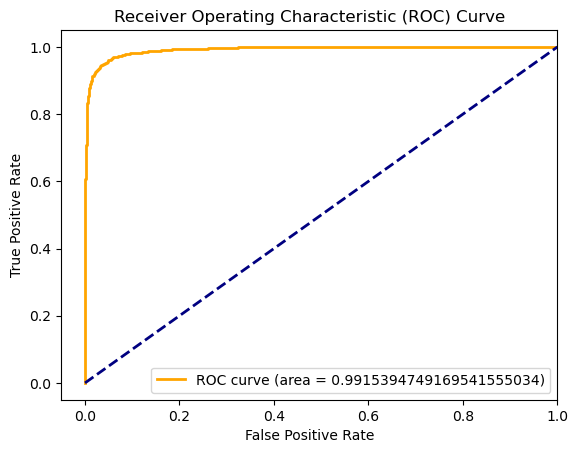

In [99]:
y_pred_proba = logreg.decision_function(xtest_tfidf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.22f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<span style="font-size:24px;">KNeighborsClassifier</span><br>

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,f1_score
knn_classifier = KNeighborsClassifier(n_neighbors=2)  # You can specify the number of neighbors
knn_classifier.fit(xtrain_tfidf, y_train)

# Make predictions on the test data
predictions = knn_classifier.predict(xtest_tfidf)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      3116
           1       0.94      0.67      0.78      3124

    accuracy                           0.82      6240
   macro avg       0.84      0.82      0.81      6240
weighted avg       0.84      0.82      0.81      6240



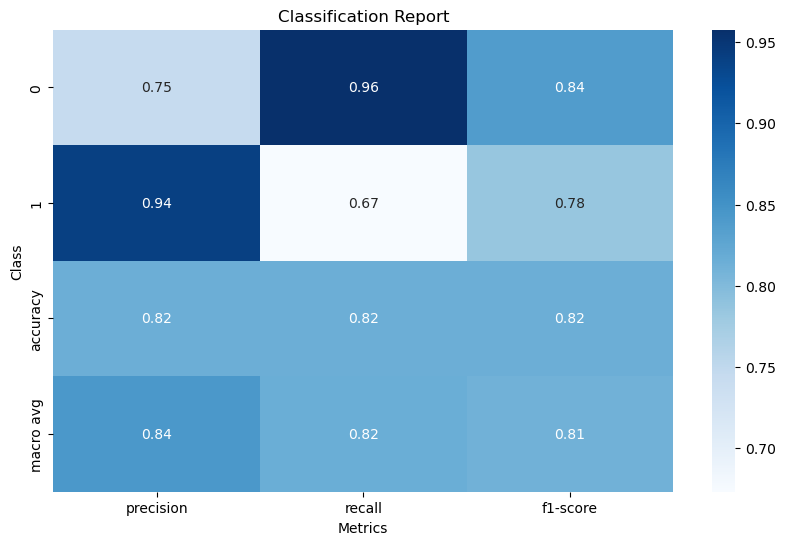

In [101]:
report=classification_report(y_test,predictions,output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [102]:
cf = confusion_matrix(y_test,predictions)
print(cf)

[[2984  132]
 [1021 2103]]


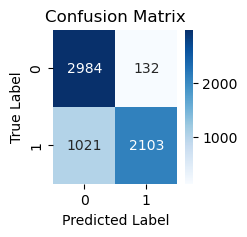

In [104]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

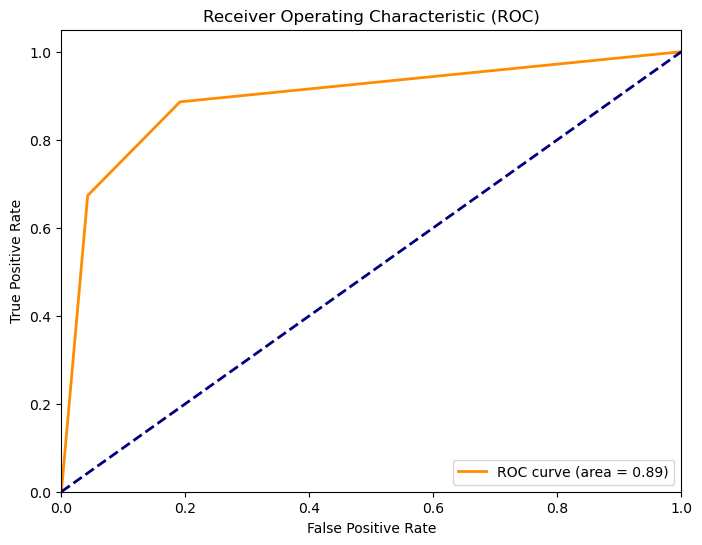

In [103]:
y_pred_proba = knn_classifier.predict_proba(xtest_tfidf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<span style="font-size:24px;">DecisionTreeClassifier</span><br>

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
dtc=DecisionTreeClassifier()
dtc.fit(xtrain_tfidf, y_train)

# Make predictions on the test data
predictions = dtc.predict(xtest_tfidf)

# Evaluate the classifier

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3116
           1       0.96      0.96      0.96      3124

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240



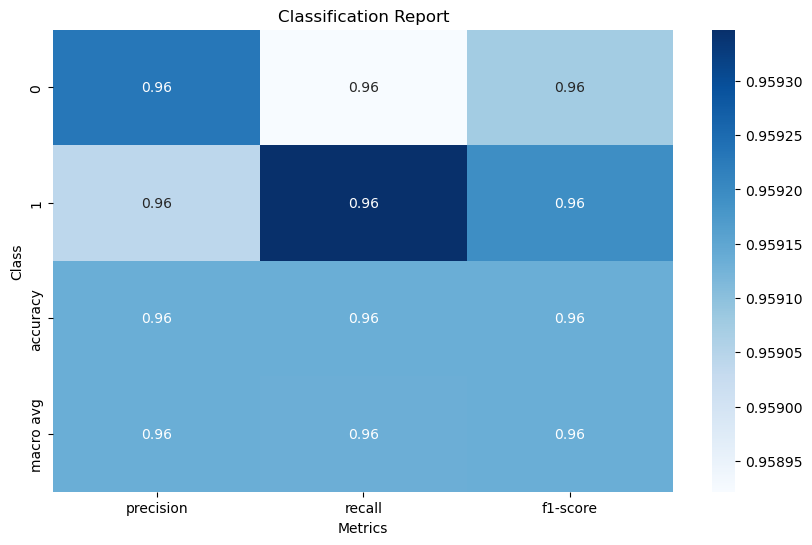

In [134]:
report=classification_report(y_test,predictions,output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [136]:
cf = confusion_matrix(y_test,predictions)
print(cf)

[[2988  128]
 [ 127 2997]]


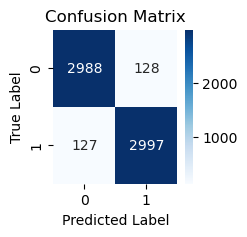

In [137]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

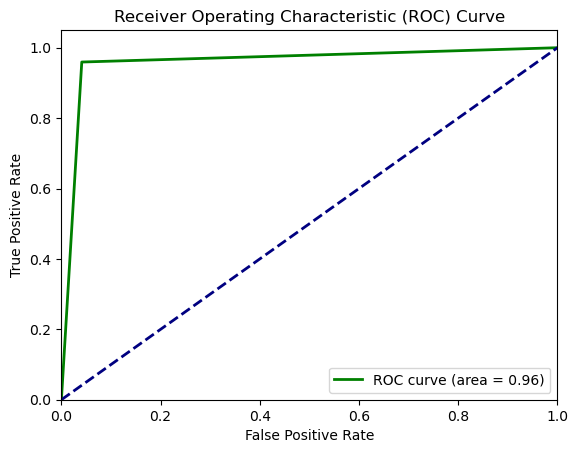

In [138]:
y_pred_proba = dtc.predict_proba(xtest_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[[2988  128]
 [ 127 2997]]


<span style="font-size:24px;">RandomForestClassifier</span><br>

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
rfc=RandomForestClassifier()
rfc.fit(xtrain_tfidf, y_train)

# Make predictions on the test data
predictions = rfc.predict(xtest_tfidf)

# Evaluate the classifier

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3116
           1       0.96      0.91      0.93      3124

    accuracy                           0.94      6240
   macro avg       0.94      0.94      0.94      6240
weighted avg       0.94      0.94      0.94      6240



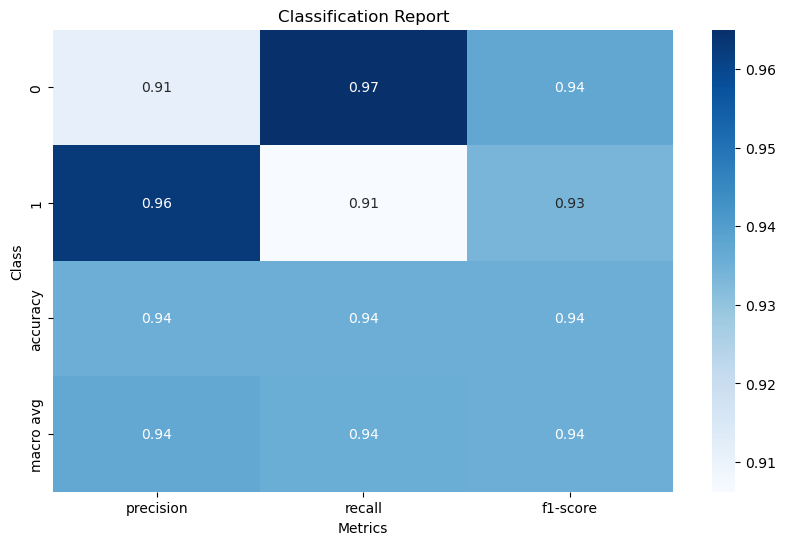

In [106]:
report=classification_report(y_test,predictions,output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [107]:
cf = confusion_matrix(y_test,predictions)
print(cf)

[[3007  109]
 [ 293 2831]]


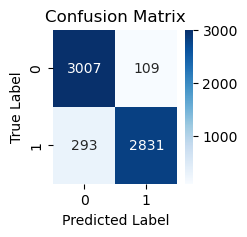

In [108]:
import seaborn as sns
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

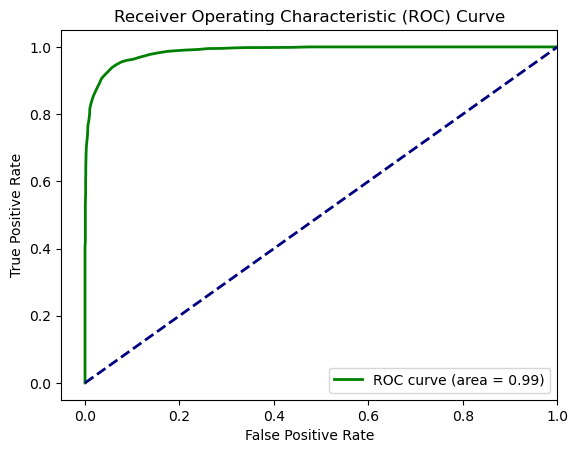

In [109]:
y_pred_proba = rfc.predict_proba(xtest_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

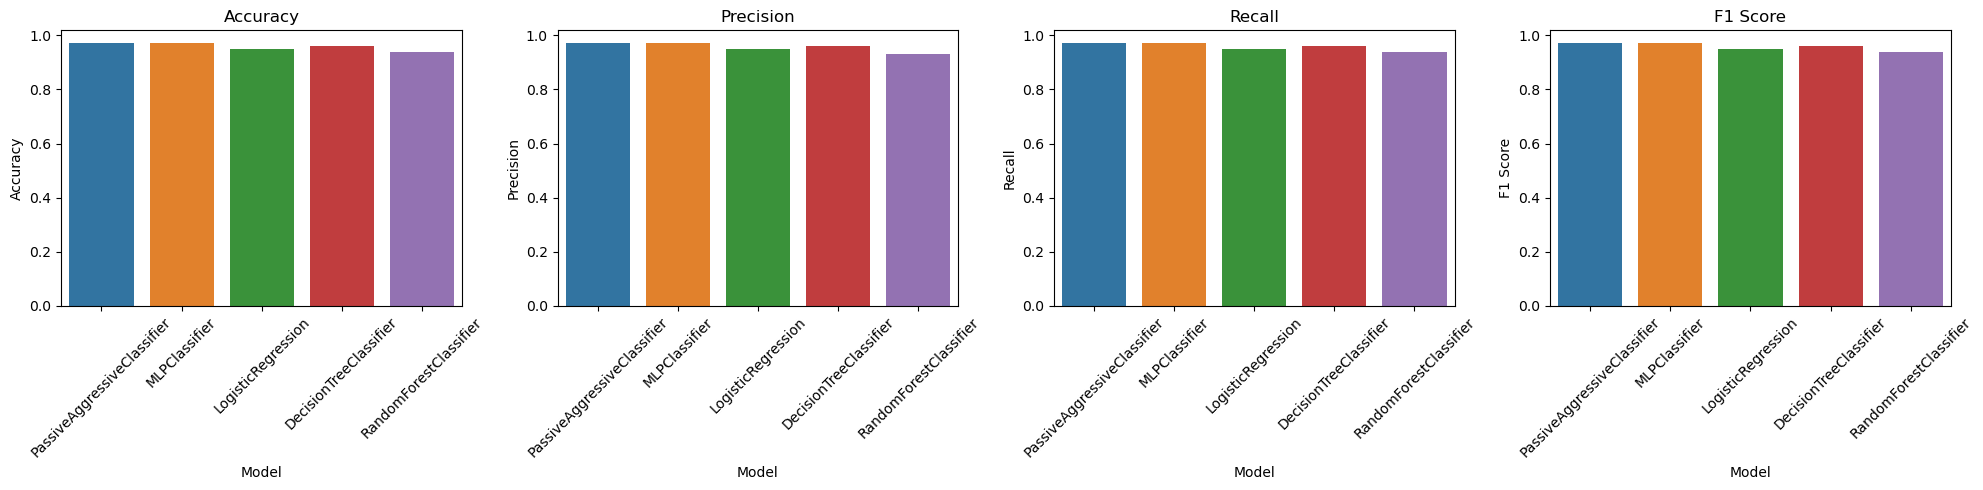

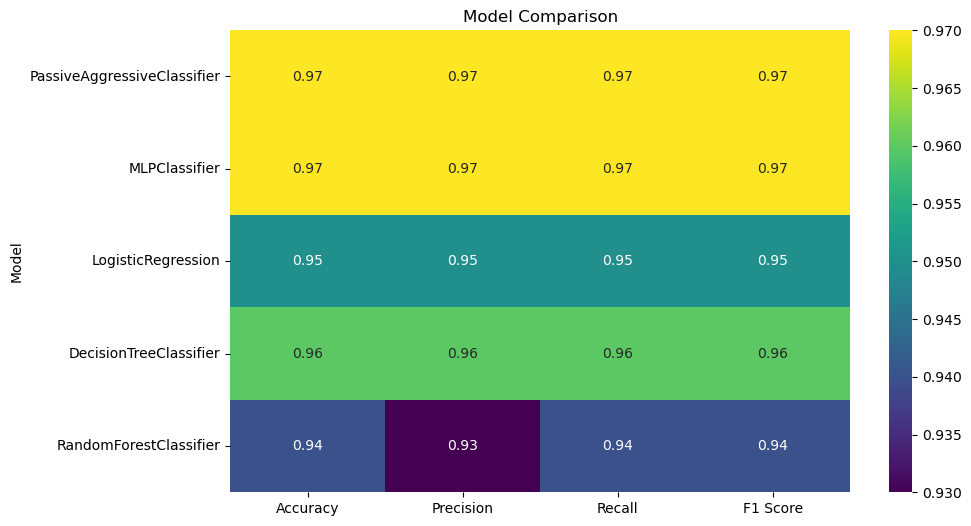

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (already built models' performance metrics)
results = [
    {'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.97, 'Precision': 0.97, 'Recall': 0.97, 'F1 Score': 0.97},
    {'Model': 'MLPClassifier', 'Accuracy': 0.97, 'Precision': 0.97, 'Recall': 0.97, 'F1 Score': 0.97},
    {'Model': 'LogisticRegression', 'Accuracy': 0.95, 'Precision': 0.95, 'Recall': 0.95, 'F1 Score': 0.95},
    {'Model': 'DecisionTreeClassifier', 'Accuracy': 0.96, 'Precision': 0.96, 'Recall': 0.96, 'F1 Score': 0.96},
    {'Model': 'RandomForestClassifier', 'Accuracy': 0.94, 'Precision': 0.93, 'Recall': 0.94, 'F1 Score': 0.94}
] 

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Define metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot bar chart
fig, ax = plt.subplots(1, len(metrics), figsize=(20, 5))

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=ax[i])
    ax[i].set_title(metric)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Plot heatmap
heatmap_data = results_df.set_index('Model')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Model Comparison')
plt.show()
